# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from matplotlib.lines import Line2D

#----- the file "main.py" contains the CFPCA method, as well as other miscellaneous functions ----
#----- Currently, we change directories to access the parent directory, where the main file is located ----

import os

os.chdir('..')
from main import *

#---- os.chdir('..') goes back to the parent directory, if main.py is in the same folder as this file, it can be omitted ---


In [2]:
# In the case a ticker is no longer available, (i.e. if it is acquired by another company), remove the corresponding ticker from 
# teck_tickers or non_techtickers and also in the subgroups list

# Read Data

In [3]:
# Define the start and end dates for the data download
startDate = '2022-09-01'
endDate = '2023-09-01'


tech_tickers = ['MSFT','GOOGL','AMZN', 'CRM','ADBE', 'NOW','INTU', 'TWLO','CRWD', 'OKTA', 'DDOG','SNOW','MDB',
                 'VEEV','ZM','NET', 'BILL', 'DOCU','BOX', 'ANSS','NTNX', 
                 'PANW', 'CTLT','ESTC', 'FSLY', 'WDAY','TEAM', 
                 'ZS', 'AAPL', 'HPQ', 'DELL', 'INTC', 'NVDA', 'AMD', 'TXN', 'QCOM', 'ASML', 
        'MU', 'AMAT', 'SWKS', 'MCHP', 'WDC', 'STM', 'AVGO', 'LRCX', 'TSM', 'ERIC', 
        'GLW', 'ANET', "NXPI", "MRVL", "ADI", "KLAC", "TER", "KEYS", "FTV",
   'AOSL','SMTC', 'MPWR','CRUS','LSCC','ON']

tech_df = pd.DataFrame()

for ticker in tech_tickers:
    data = yf.download(ticker, start=startDate, end=endDate, progress=False)
    
    if tech_df.empty:
        tech_df = pd.DataFrame(data['Close']).rename(columns={'Close': ticker})
    else:
        tech_df = tech_df.join(pd.DataFrame(data['Close']).rename(columns={'Close': ticker}), how='outer')

tech_df.reset_index(inplace=True)
tech_df.rename(columns={'index': 'Date'}, inplace=True)

In [4]:
nontech_tickers = [
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'AXP', 'V', 'MA',
    'PG', 'KO', 'PEP', 'MO', 'PM', 'UL', 'JNJ', 'PFE', 'MRK',
    'GSK', 'NVS', 'ABBV', 'ABT', 'AMGN', 'BMY', 'CVS', 'WBA', 'MMM', 'GE',
    'HON', 'UNP', 'UPS', 'CAT', 'DE', 'BA', 'LMT', 'RTX', 'GD', 'NOC',
    'XOM', 'CVX', 'BP', 'SLB', 'COP', 'EOG', 'OXY',
    'WMT', 'COST', 'TGT', 'HD']

nontech_df = pd.DataFrame()

for ticker in nontech_tickers:
    data = yf.download(ticker, start=startDate, end=endDate, progress=False)
    
    if nontech_df.empty:
        nontech_df = pd.DataFrame(data['Close']).rename(columns={'Close': ticker})
    else:
        nontech_df = nontech_df.join(pd.DataFrame(data['Close']).rename(columns={'Close': ticker}), how='outer')

nontech_df.reset_index(inplace=True)
nontech_df.rename(columns={'index': 'Date'}, inplace=True)

In [5]:
# Subgroups
groups = {
    'Cloud Computing': [
       'MSFT','GOOGL','AMZN', 'CRM','ADBE', 'NOW','INTU', 'TWLO','CRWD', 'OKTA', 'DDOG','SNOW','MDB',
                 'VEEV','ZM','NET', 'BILL', 'DOCU','BOX', 'ANSS','NTNX', 
                 'PANW', 'CTLT','ESTC', 'FSLY', 'WDAY','TEAM', 
                 'ZS'],
    
    'Hardware+Semiconductors': [
        'AAPL', 'HPQ', 'DELL', 'INTC', 'NVDA', 'AMD', 'TXN', 'QCOM', 'ASML', 
        'MU', 'AMAT', 'SWKS', 'MCHP', 'WDC', 'STM', 'AVGO', 'LRCX', 'TSM', 'ERIC', 
        'GLW', 'ANET', "NXPI", "MRVL", "ADI", "KLAC", "TER", "KEYS", "FTV",
   'AOSL','SMTC', 'MPWR','CRUS','LSCC','ON'
]
}

# Figure 7b

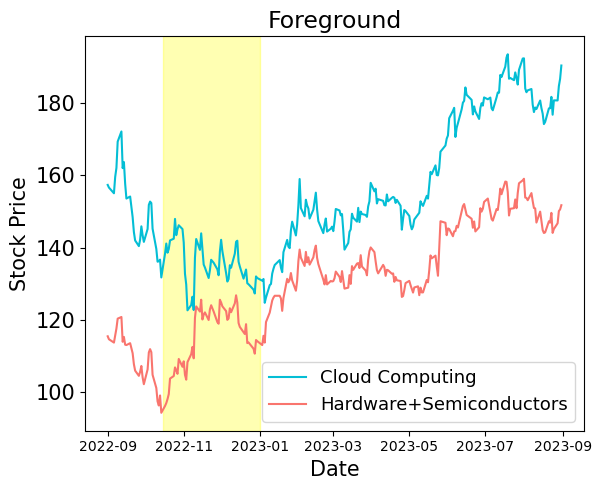

In [6]:
plt.figure(figsize=(6, 5))

# Plotting the mean for Cloud Computing
plt.plot(tech_df['Date'], tech_df[groups['Cloud Computing']].mean(axis=1), label='Cloud Computing', color='#04BED5')

# Plotting the mean for Hardware and Semiconductors
plt.plot(tech_df['Date'], tech_df[groups['Hardware+Semiconductors']].mean(axis=1), label='Hardware+Semiconductors', color='#F9756E')

# Highlighting a specific period for both groups
plt.axvspan('2022-10-15', '2023-01-01', color='yellow', alpha=0.3)

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title("Foreground", fontsize = 17)
plt.legend(fontsize = 13)
#plt.xticks(rotation=45)
plt.tight_layout()
#plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()


# Figure 7d

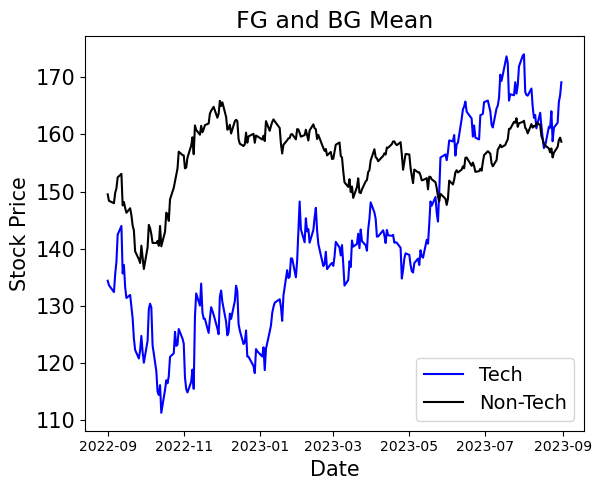

In [7]:
plt.figure(figsize=(6, 5))

tech_copy = tech_df.copy()
tech_copy['Mean'] = tech_copy[tech_copy.columns[1:]].mean(axis=1)
plt.plot(tech_copy['Date'], tech_copy['Mean'], label='Tech', color = "blue")


nontech_copy = nontech_df.copy()

# Calculate the mean of tech
nontech_copy['Mean'] = nontech_copy[nontech_copy.columns[1:]].mean(axis=1)

# Plot the mean of nontech
plt.plot(nontech_copy['Date'], nontech_copy['Mean'], label='Non-Tech', color = "black")



plt.xlabel('Date', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.title('FG and BG Mean', fontsize = 17)
plt.legend(fontsize = 14, loc = 'lower right')
#plt.xticks(rotation=45)
plt.tight_layout()
#plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()


# Get foreground and background data

In [8]:
tech_list = [tech_df[column].tolist() for column in tech_df.columns if column != 'Date']
nontech_list = [nontech_df[column].tolist() for column in nontech_df.columns if column != 'Date']

In [9]:
def center_time_series(data_list, log_transform):

    if log_transform:
        data_list = np.log1p(data_list)

    data_array = np.array(data_list)
    means = np.mean(data_array, axis=0)
    standardized_data = (data_array - means) 
    standardized_data = standardized_data.tolist()
        
    return standardized_data


centered_tech_list = center_time_series(tech_list, log_transform=True)
centered_nontech_list = center_time_series(nontech_list, log_transform=True)

In [10]:
t = np.linspace(0, 250, 251)
cfpca = CFPCA(centered_tech_list,centered_nontech_list,30,t, True, True)[0]
fpca_foreground = CFPCA(centered_tech_list,centered_nontech_list,0,t, True, True)[0]
fpca_foreground_background = CFPCA(centered_tech_list+centered_nontech_list,centered_nontech_list,0,t, True, True)[0]


# Figure 7f

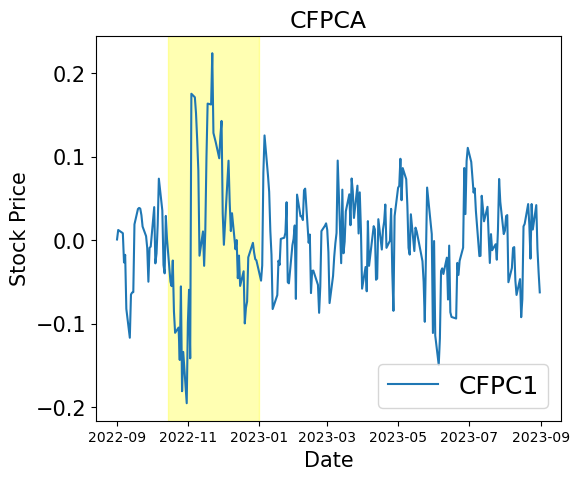

In [12]:
plt.figure(figsize=(6 ,5))
plt.xlabel("Date", fontsize = 15)
#plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.plot(tech_df['Date'], cfpca[:,0]);

plt.axvspan('2022-10-15', '2023-01-01', color='yellow', alpha=0.3)
plt.title("CFPCA", fontsize = 17)
plt.ylabel("Stock Price", fontsize = 15)
plt.legend(['CFPC1'], loc = "lower right", fontsize = 18);
plt.show()

# Appendix - Figure 11c

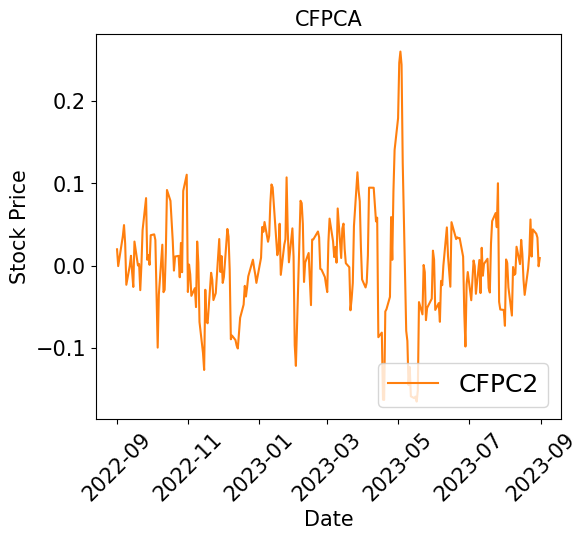

In [24]:
plt.figure(figsize=(6 ,5))
plt.xlabel("Date", fontsize = 15)
plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.plot(tech_df['Date'], cfpca[:,1], color=(1.0, 0.498, 0.055));

plt.title("CFPCA", fontsize = 15)
plt.ylabel("Stock Price", fontsize = 15)
plt.legend(['CFPC2'], loc = "lower right", fontsize = 18);


# Appendix - Figure 11a

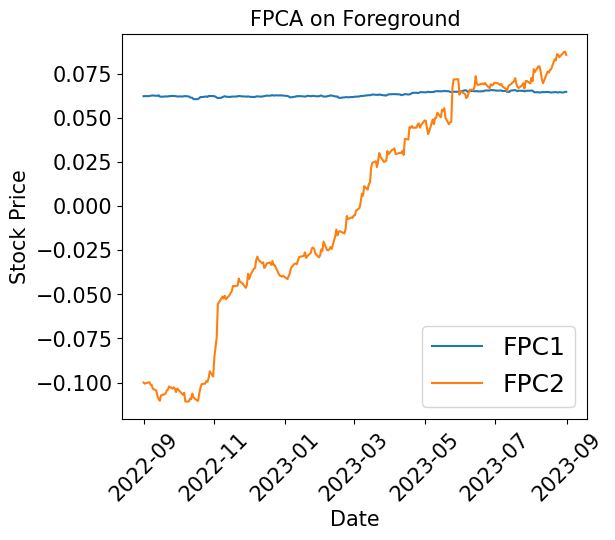

In [25]:
plt.figure(figsize=(6 ,5))
plt.xlabel("Date", fontsize = 15)
plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.plot(tech_df['Date'], fpca_foreground[:,0]);
plt.plot(tech_df['Date'], fpca_foreground[:,1]);

plt.title("FPCA on Foreground", fontsize = 15)
plt.ylabel("Stock Price", fontsize = 15)
plt.legend(['FPC1', 'FPC2'], loc = "lower right", fontsize = 18);


# Appendix - Figure 11b

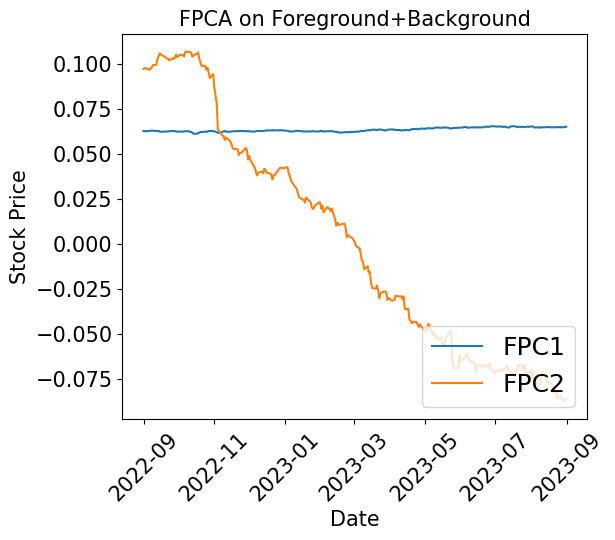

In [26]:
plt.figure(figsize=(6 ,5))
plt.xlabel("Date", fontsize = 15)
plt.xticks(fontsize = 15, rotation=45)
plt.yticks(fontsize = 15)
plt.plot(tech_df['Date'], fpca_foreground_background[:,0]);
plt.plot(tech_df['Date'], fpca_foreground_background[:,1]);

plt.title("FPCA on Foreground+Background", fontsize = 15)
plt.ylabel("Stock Price", fontsize = 15)
plt.legend(['FPC1', 'FPC2'], loc = "lower right", fontsize = 18);


In [36]:
#--------- CALCULATE SCORES -----------------

cfpc_1 = calculate_scores(centered_tech_list, cfpca[:,0])
cfpc_2 = calculate_scores(centered_tech_list, cfpca[:,1])

fpc_1_foreground = calculate_scores(centered_tech_list, fpca_foreground[:,0])
fpc_2_foreground = calculate_scores(centered_tech_list, fpca_foreground[:,1])

fpc_1_foreground_background = calculate_scores(centered_tech_list, fpca_foreground_background[:,0])
fpc_2_foreground_background = calculate_scores(centered_tech_list, fpca_foreground_background[:,1])


In [37]:
#--------- DEFINE PLOT FUNCTIONS --------------

group_colors = {
    'Cloud Computing': '#04BED5',
    'Hardware+Semiconductors': '#F9756E',
}

def find_group_color(company):
    for group, companies in groups.items():
        if company in companies:
            return group_colors[group]
    return 'gray'  

def plot_pc_scores_with_labels(pc_scores1, pc_scores2, labels, title, leg_loc):
    plt.figure(figsize = (6,5))

    texts = []
    
    for i, label in enumerate(labels):
        color = find_group_color(label)
        plt.scatter(pc_scores1[i], pc_scores2[i], color=color)
    
    legend_items = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=group) for group, color in group_colors.items()]
    plt.legend(handles=legend_items, loc=leg_loc, fontsize = 13)    
    plt.tight_layout()
    plt.title(label = title,fontsize=17)


# Figure 5a

SS: 0.012
DB: 4.62


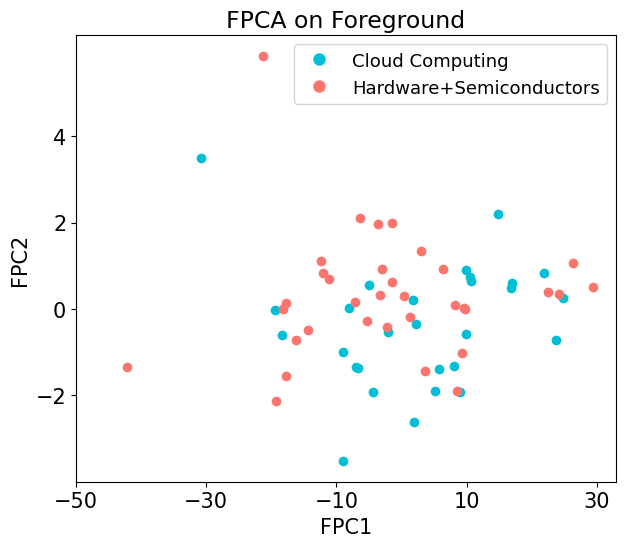

In [38]:
X = np.column_stack((fpc_1_foreground, fpc_2_foreground))
tech_company_tickers = tech_df.columns[1:]  

ordered_group_tickers = []
for group in groups.values():
    ordered_group_tickers.extend(group)

# Create a mapping of tickers to their group index based on the ordered list
ticker_to_group_index = {ticker: group_idx for group_idx, tickers in enumerate(groups.values()) for ticker in tickers}

# Create labels for each company based on its group, preserving the order of tech_company_tickers
labels = np.array([ticker_to_group_index[ticker] for ticker in tech_company_tickers if ticker in ticker_to_group_index])

silhouette_avg = silhouette_score(X, labels)
db_avg = davies_bouldin_score(X, labels)
print("SS: " + str(np.round(silhouette_avg,3)))
print("DB: " + str(np.round(db_avg,2)))

plot_pc_scores_with_labels(fpc_1_foreground, fpc_2_foreground, tech_company_tickers, title="FPCA on Foreground", leg_loc = "upper right")


plt.xlabel('FPC1', fontsize=15)
plt.ylabel('FPC2', fontsize=15)

x_tick_values = np.linspace(-50,30,5)  
plt.xticks(x_tick_values, fontsize=15)

y_tick_values = np.linspace(-2,4,4)  
plt.yticks(y_tick_values, fontsize=15)

plt.show()


# Figure 5c

SS: 0.011
DB: 4.63


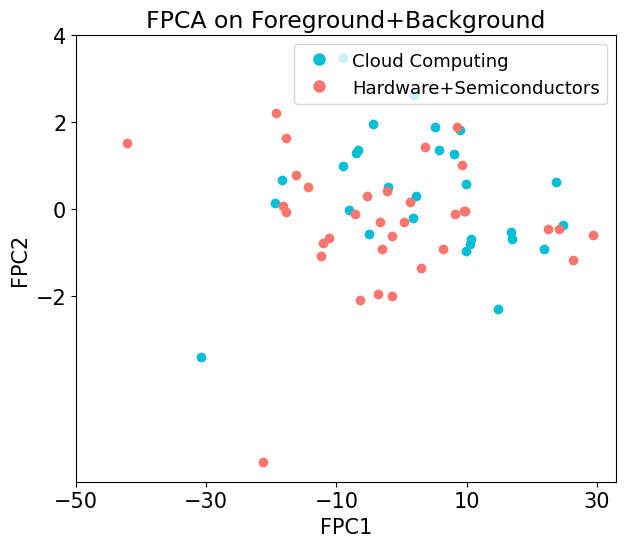

In [30]:
X = np.column_stack((fpc_1_foreground_background, fpc_2_foreground_background))
tech_company_tickers = tech_df.columns[1:]  

ordered_group_tickers = []
for group in groups.values():
    ordered_group_tickers.extend(group)

ticker_to_group_index = {ticker: group_idx for group_idx, tickers in enumerate(groups.values()) for ticker in tickers}
labels = np.array([ticker_to_group_index[ticker] for ticker in tech_company_tickers if ticker in ticker_to_group_index])

silhouette_avg = silhouette_score(X, labels)
db_avg = davies_bouldin_score(X, labels)
print("SS: " + str(np.round(silhouette_avg,3)))
print("DB: " + str(np.round(db_avg,2)))

plot_pc_scores_with_labels(fpc_1_foreground_background, fpc_2_foreground_background, tech_company_tickers, title="FPCA on Foreground+Background", leg_loc = "upper right")

plt.xlabel('FPC1', fontsize=15)
plt.ylabel('FPC2', fontsize=15)

x_tick_values = np.linspace(-50,30,5)  
plt.xticks(x_tick_values, fontsize=15)

y_tick_values = np.linspace(-2,4,4)  
plt.yticks(y_tick_values, fontsize=15)

plt.show();


# Figure 5e

SS: 0.33
DB: 1.08


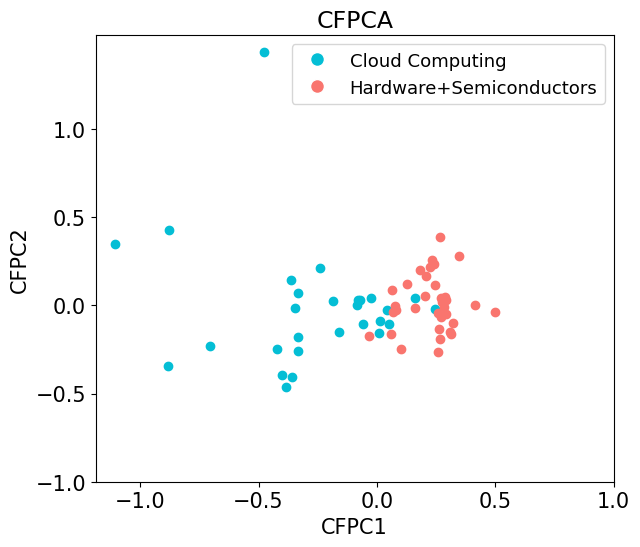

In [31]:
X = np.column_stack((cfpc_1, cfpc_2))
tech_company_tickers = tech_df.columns[1:] 

ordered_group_tickers = []
for group in groups.values():
    ordered_group_tickers.extend(group)

ticker_to_group_index = {ticker: group_idx for group_idx, tickers in enumerate(groups.values()) for ticker in tickers}
labels = np.array([ticker_to_group_index[ticker] for ticker in tech_company_tickers if ticker in ticker_to_group_index])

silhouette_avg = silhouette_score(X, labels)
db_avg = davies_bouldin_score(X, labels)
print("SS: " + str(np.round(silhouette_avg,2)))
print("DB: " + str(np.round(db_avg,2)))

plot_pc_scores_with_labels(cfpc_1, cfpc_2, tech_company_tickers, title="CFPCA", leg_loc = 'upper right')

plt.xlabel('CFPC1', fontsize=15)
plt.ylabel('CFPC2', fontsize=15)

x_tick_values = np.linspace(-1,1,5)  
plt.xticks(x_tick_values, fontsize=15)

y_tick_values = np.linspace(-1,1,5)  
plt.yticks(y_tick_values, fontsize=15)

plt.show()

# Appendix - Figure 9b

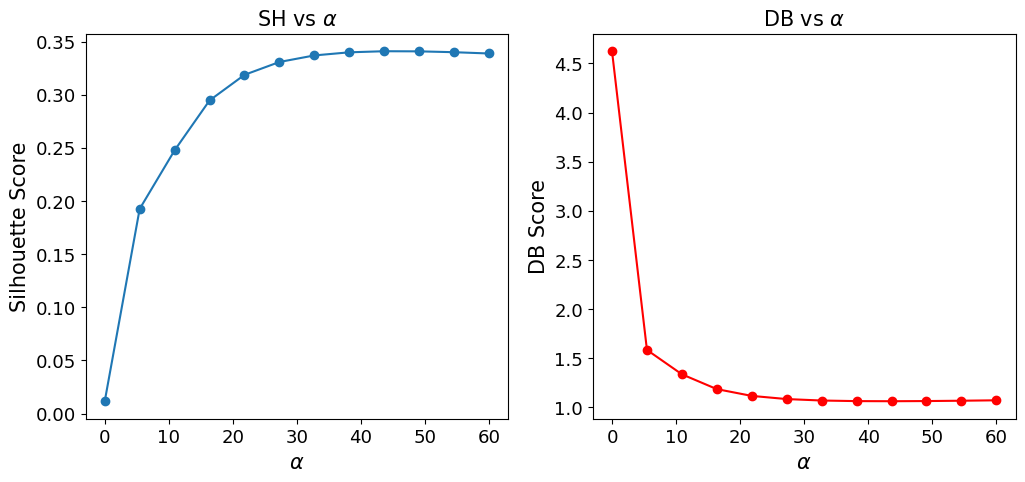

In [32]:
def compute_and_plot_components(foreground, background, alpha):
    components = CFPCA(foreground,background, alpha, t, True, True)[0]

    unique_pc_score1 = calculate_scores(foreground, components[:,0])
    unique_pc_score2 = calculate_scores(foreground, components[:,1])
    X = np.column_stack((unique_pc_score1, unique_pc_score2))

    return X

alphas = np.linspace(0,60,12)
silhouette_scores = []
db_scores = []

for alpha in alphas:
    X = compute_and_plot_components(centered_tech_list, centered_nontech_list, alpha)
    silhouette_avg = silhouette_score(X, labels)
    db_avg = davies_bouldin_score(X, labels)
    
    silhouette_scores.append(silhouette_avg)
    db_scores.append(db_avg)

# Plotting the silhouette and DB scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, silhouette_scores, marker='o', linestyle='-')
plt.title(r'SH vs $\alpha$', fontsize = 15)
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('Silhouette Score', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.subplot(1, 2, 2)
plt.plot(alphas, db_scores, marker='o', linestyle='-', color='r')
plt.title(r'DB vs $\alpha$', fontsize = 15)
plt.xlabel(r'$\alpha$', fontsize = 15)
plt.ylabel('DB Score', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show();